In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np


C:\Users\zuolo\anaconda3\envs\tensor_data_science\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
train_digit_df = pd.read_csv('inputs/train.csv', delimiter=',')

In [4]:
train_digit_df_y = train_digit_df["label"]
train_digit_df_x = train_digit_df.drop("label", axis=1)

train_digit_df_x_np = train_digit_df_x.to_numpy().reshape(-1, 28, 28, 1)
train_digit_df_y_np = train_digit_df_y.to_numpy().reshape(-1, 1)

print(train_digit_df_x.shape,
      train_digit_df_y_np.shape,
      train_digit_df_x_np.shape,
      train_digit_df_y.shape,
      sep='\n')

train_digit_df_x.head()

(42000, 784)
(42000, 1)
(42000, 28, 28, 1)
(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


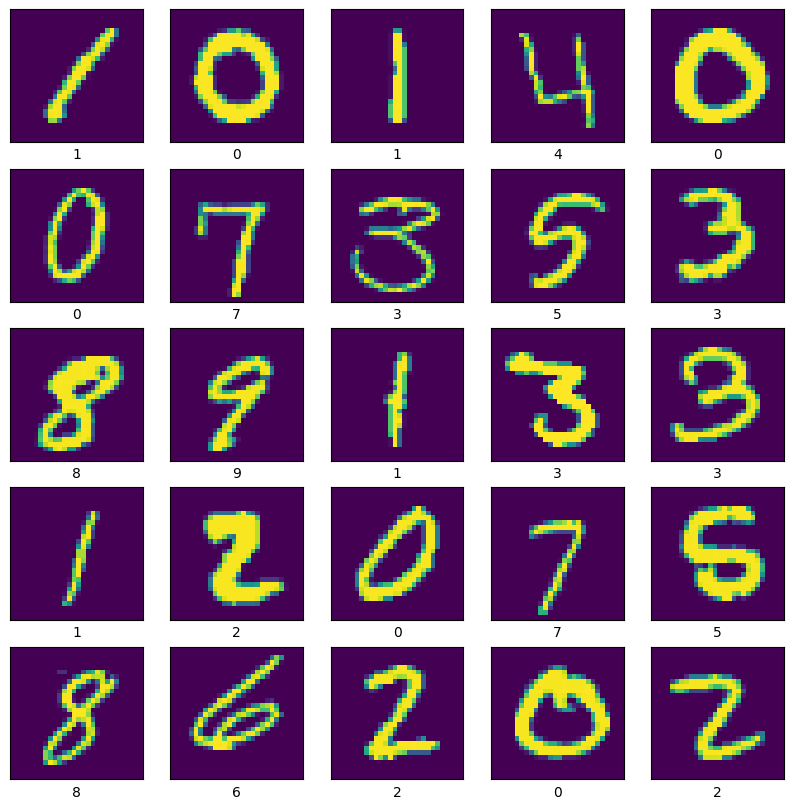

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digit_df_x_np[i])
    plt.xlabel(train_digit_df_y[i])
plt.show()

In [6]:
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

layers = [
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
]

model = Sequential(layers)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_digit_df_x_np,
                    train_digit_df_y_np,
                    epochs=10,
                    batch_size=None,
                    steps_per_epoch=None,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/10
1050/1050 - 12s - 11ms/step - accuracy: 0.9348 - loss: 0.2515 - val_accuracy: 0.9737 - val_loss: 0.0788
Epoch 2/10
1050/1050 - 9s - 9ms/step - accuracy: 0.9776 - loss: 0.0709 - val_accuracy: 0.9751 - val_loss: 0.0764
Epoch 3/10
1050/1050 - 10s - 10ms/step - accuracy: 0.9849 - loss: 0.0497 - val_accuracy: 0.9839 - val_loss: 0.0562
Epoch 4/10
1050/1050 - 10s - 10ms/step - accuracy: 0.9870 - loss: 0.0396 - val_accuracy: 0.9868 - val_loss: 0.0474
Epoch 5/10
1050/1050 - 10s - 10ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9839 - val_loss: 0.0558
Epoch 6/10
1050/1050 - 10s - 10ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9857 - val_loss: 0.0497
Epoch 7/10
1050/1050 - 11s - 11ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9869 - val_loss: 0.0554
Epoch 8/10
1050/1050 - 10s - 10ms/step - accuracy: 0.9922 - loss: 0.0233 - val_accuracy: 0.9848 - val_loss: 0.0641
Epoch 9/10
1050/1050 - 8s - 8ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accur

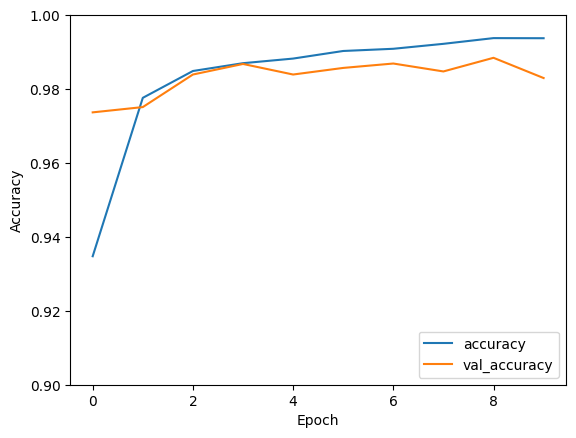

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')


In [11]:
test_digit_df = pd.read_csv('inputs/test.csv', delimiter=',')

predictions = model.predict(test_digit_df.to_numpy().reshape(-1, 28, 28, 1))
predictions = np.argmax(predictions, axis=1)



875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [13]:
output = pd.DataFrame({'ImageId': test_digit_df.index + 1, 'Label': predictions.astype(int)})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
